## Finner ut om lengden på filmer har blitt kortere over tid.

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
Invalid length format: 
Invalid length format: 
Invalid length format: 


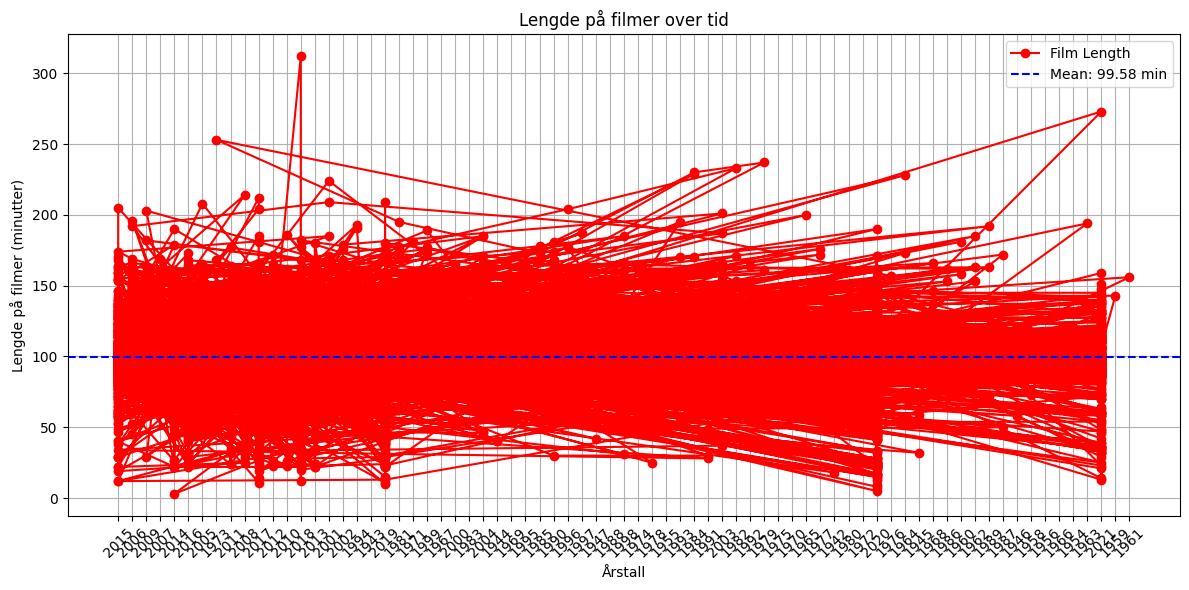

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np

årstall = []
lengde_filmer = []

with open('netflix_titles.csv', encoding="utf-8-sig") as fil:
    leser = csv.reader(fil, delimiter=',')
    
    # Gjør at header blir ignorert ved å bruke next, men kan likeså godt bare printe ut headeren
    headers = next(leser)
    print(headers)
    
    for rad in leser:
        if rad[1] == 'Movie':
            årstall.append(rad[7])
            
            # må splitte lengden siden formatet for lengden av filmer er "x min"
            ant_min_str = rad[9].split(' ')[0]
            
            # Error handling
            if ant_min_str.isdigit(): 
                ant_min = int(ant_min_str)
                lengde_filmer.append(ant_min)
            else:
                print(f"Invalid length format: {rad[9]}")
                årstall.pop()  # Remove the corresponding year if the length is invalid

# Reverse the lists to maintain chronological order
rev_aarstall = årstall[::-1]
rev_lengde_filmer = lengde_filmer[::-1]

# Convert to numpy arrays
rev_aarstall = np.array(rev_aarstall)
rev_lengde_filmer = np.array(rev_lengde_filmer)

plt.figure(figsize=(12, 6))
plt.plot(rev_aarstall, rev_lengde_filmer, marker='o', color='r', label='Film Length')
plt.xlabel('Årstall')
plt.ylabel('Lengde på filmer (minutter)')
plt.title('Lengde på filmer over tid')
plt.grid()
plt.xticks(rotation=45)
plt.legend()


mean_lengde = np.mean(rev_lengde_filmer)


plt.axhline(y=mean_lengde, color='b', linestyle='--', label=f'Mean: {mean_lengde:.2f} min')
plt.legend()

plt.tight_layout()
plt.show()